In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/clean/airbnbnyc_cleaned.csv")
df.head()

,name,host_id,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,price,maximum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month,total_amenities
0,Superfast Wi-Fi. Clean & quiet home by the park,2787,f,Kensington,Brooklyn,40.64529,-73.97238,Private room in condo,Private room,2,1.0,285.0,730,347,9,6,0.08,761
1,Skylit Midtown Manhattan Spacious Studio,2845,f,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,0.0,240.0,1125,312,49,3,0.26,553
2,Spacious Family Friendly Duplex w/ Patio + Yard,7378,f,Sunset Park,Brooklyn,40.66265,-73.99454,Entire townhouse,Entire home/apt,4,2.0,215.0,730,80,4,1,0.03,816
3,Only 2 stops to Manhattan studio,15991,t,Williamsburg,Brooklyn,40.70935,-73.95342,Entire rental unit,Entire home/apt,3,2.0,97.0,120,219,196,1,1.00,384
4,UES Beautiful Blue Room,16800,f,East Harlem,Manhattan,40.78778,-73.94759,Private room in rental unit,Private room,1,2.0,63.0,120,254,253,1,1.33,364


Describe numerical data

In [4]:
df.describe()

,host_id,latitude,longitude,accommodates,bedrooms,price,maximum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month,total_amenities
count,2.145900e+04,21459.000000,21459.000000,21459.000000,21459.000000,21459.000000,21459.000000,21459.000000,21459.000000,21459.000000,21459.000000,21459.000000
mean,2.091221e+08,40.727775,-73.944380,2.890023,1.341116,521.528356,464.162776,245.644205,35.545319,84.881076,0.799522,542.227830
std,2.018163e+08,0.059228,0.060472,2.045280,0.970509,3501.384801,397.233750,106.924975,80.932657,234.721884,1.946193,302.452586
min,1.678000e+03,40.500366,-74.251907,1.000000,0.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
25%,2.512704e+07,40.685615,-73.983615,2.000000,1.000000,89.000000,120.000000,167.000000,0.000000,1.000000,0.000000,310.000000
50%,1.213795e+08,40.728090,-73.954070,2.000000,1.000000,154.000000,365.000000,270.000000,5.000000,3.000000,0.200000,499.000000
75%,4.073020e+08,40.763410,-73.922245,4.000000,2.000000,270.000000,730.000000,342.000000,37.000000,20.000000,0.920000,734.000000
max,7.005911e+08,40.905919,-73.711822,16.000000,15.000000,50184.000000,3000.000000,365.000000,3277.000000,1054.000000,121.970000,2069.000000


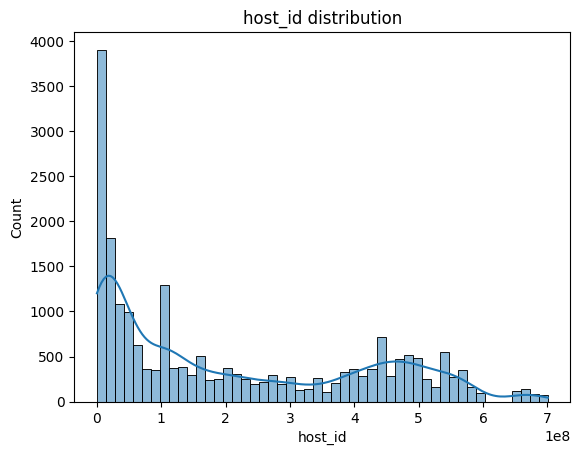

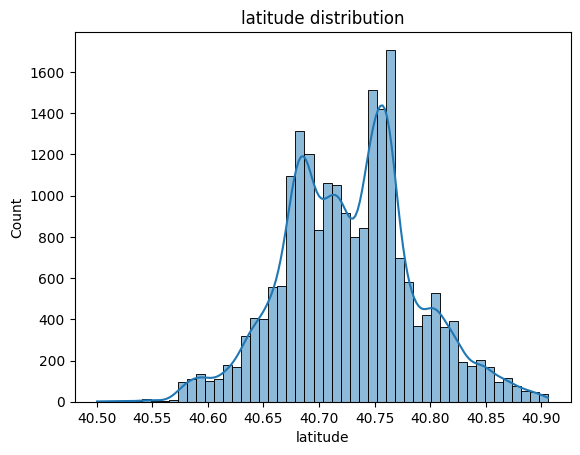

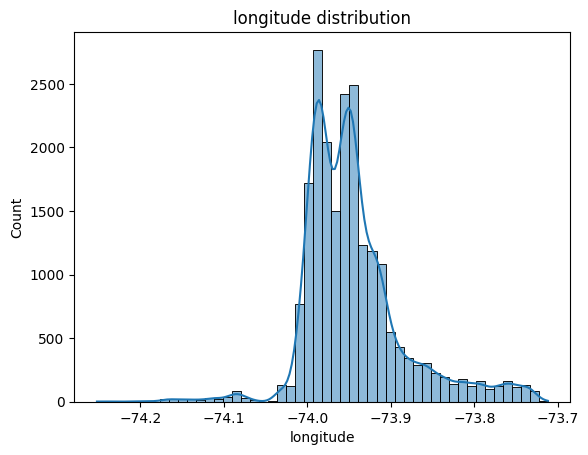

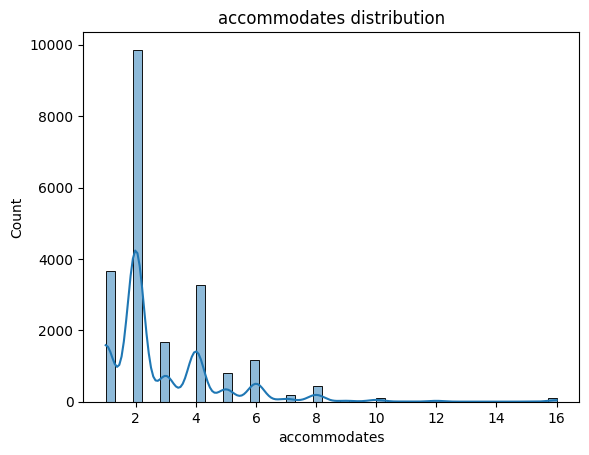

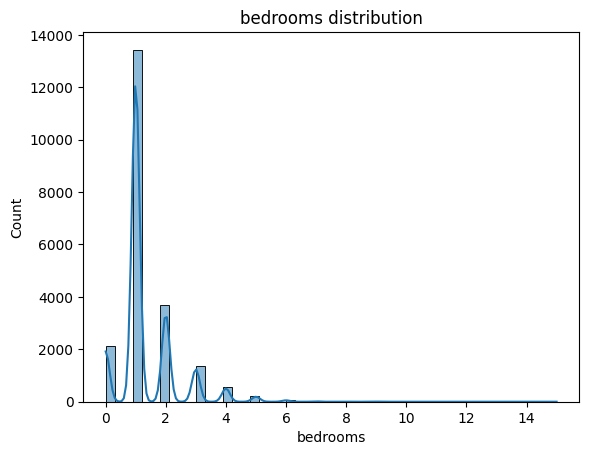

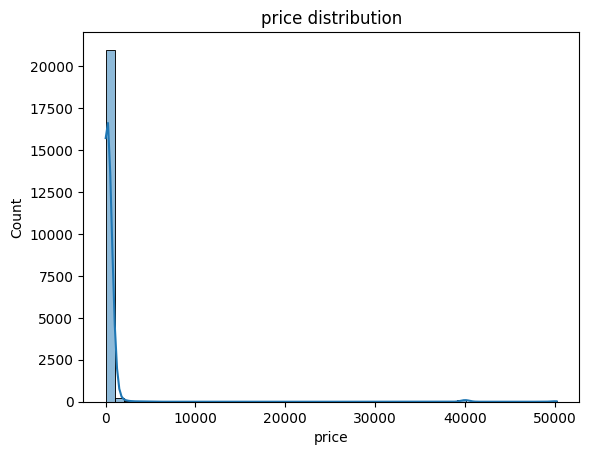

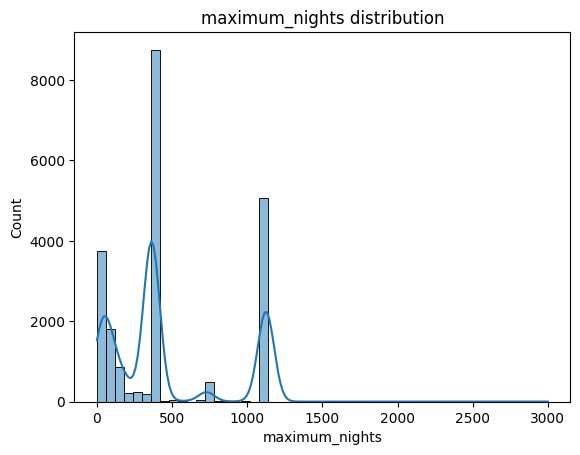

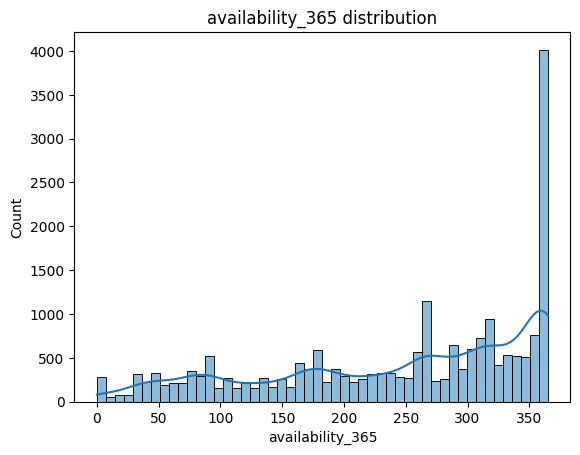

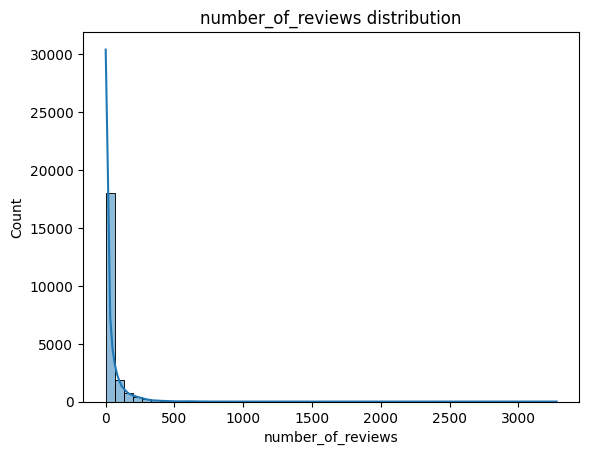

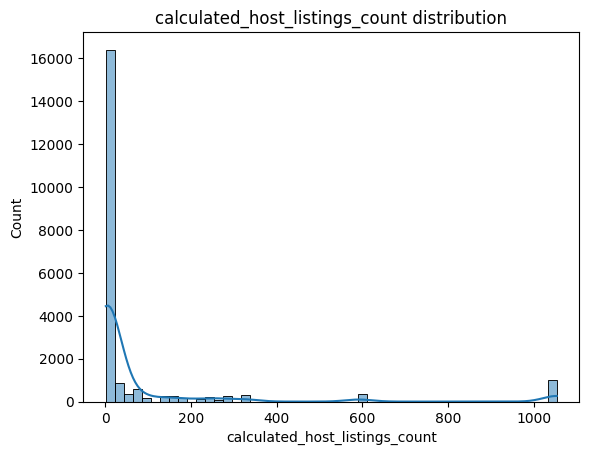

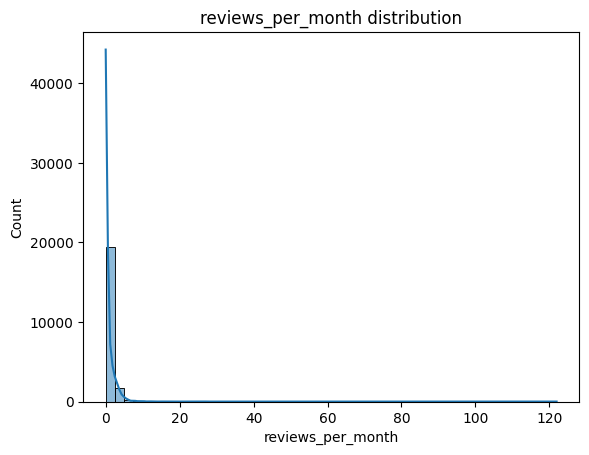

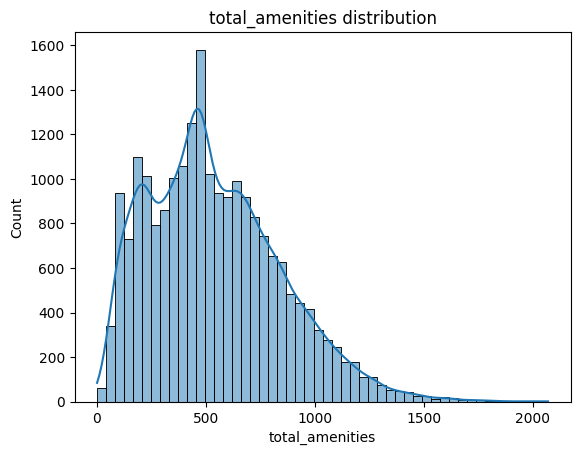

In [5]:
numerical_cols=['host_id','latitude','longitude','accommodates','bedrooms','price','maximum_nights','availability_365','number_of_reviews','calculated_host_listings_count','reviews_per_month','total_amenities']
for col in numerical_cols:
    sns.histplot(df[col], bins=50,kde=True)
    plt.title(f'{col} distribution')
    plt.show()    

# Describe Categorical columns

In [7]:
df.describe(include=['O'])

,name,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type
count,21459,21459,21459,21459,21459,21459
unique,20615,3,222,5,61,4
top,Wyndham Midtown 45 | 2BR/2BA King Bed Suite,f,Midtown,Manhattan,Entire rental unit,Entire home/apt
freq,15,15314,1364,9543,9363,12287


total number of superhost(True is superhost)

In [9]:
df.host_is_superhost.value_counts()

host_is_superhost
f                    15314
t                     5751
No info available      394
Name: count, dtype: int64

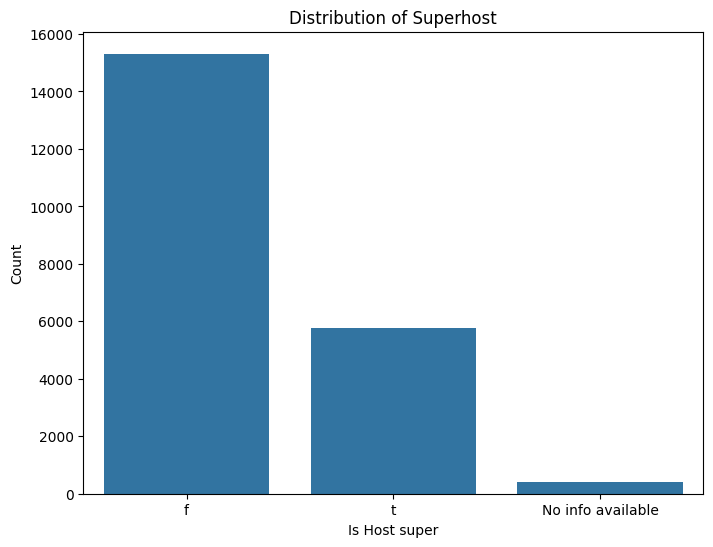

In [10]:
count=df['host_is_superhost'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=count.index, y=count.values)
plt.xlabel('Is Host super')
plt.ylabel('Count')
plt.title('Distribution of Superhost')
plt.show()

value counts of  each neighbourhood group

In [12]:
df.neighbourhood_group_cleansed.value_counts()

neighbourhood_group_cleansed
Manhattan        9543
Brooklyn         7332
Queens           3359
Bronx             907
Staten Island     318
Name: count, dtype: int64

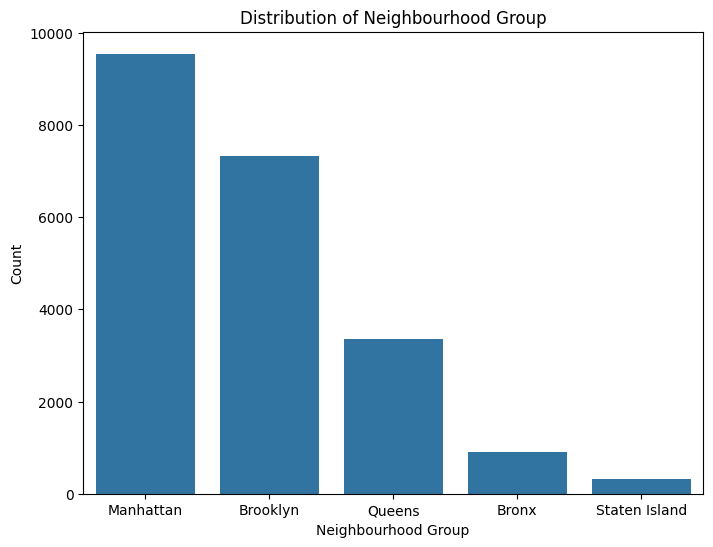

In [13]:
neighbourhood_group_count=df['neighbourhood_group_cleansed'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=neighbourhood_group_count.index, y=neighbourhood_group_count.values)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Distribution of Neighbourhood Group')
plt.show()

# Top 5 neighbourhood(total 222 neighbourhood)

In [15]:
df.neighbourhood_cleansed.value_counts()[:5]

neighbourhood_cleansed
Midtown               1364
Bedford-Stuyvesant    1360
Hell's Kitchen         994
Upper East Side        988
Harlem                 959
Name: count, dtype: int64

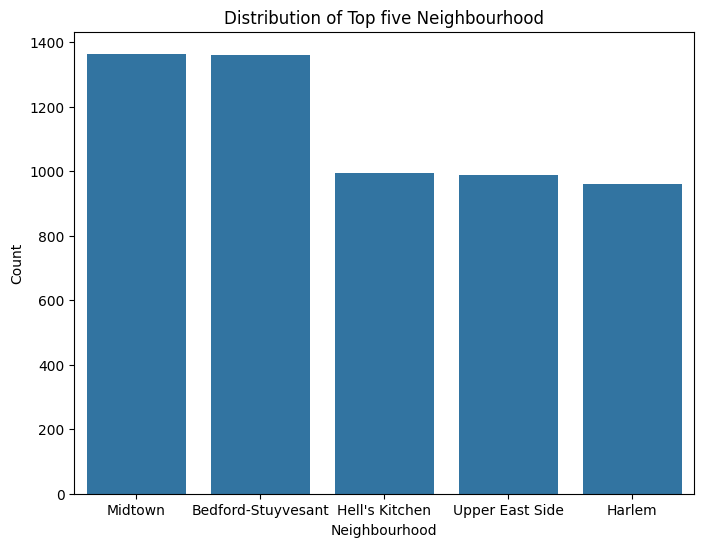

In [16]:
top_five_neighbourhood_count=df['neighbourhood_cleansed'].value_counts()[:5]
plt.figure(figsize=(8, 6))
sns.barplot(x=top_five_neighbourhood_count.index, y=top_five_neighbourhood_count.values)
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Top five Neighbourhood')
plt.show()

# Count of room_type

In [18]:
df.room_type.value_counts()

room_type
Entire home/apt    12287
Private room        8817
Hotel room           215
Shared room          140
Name: count, dtype: int64

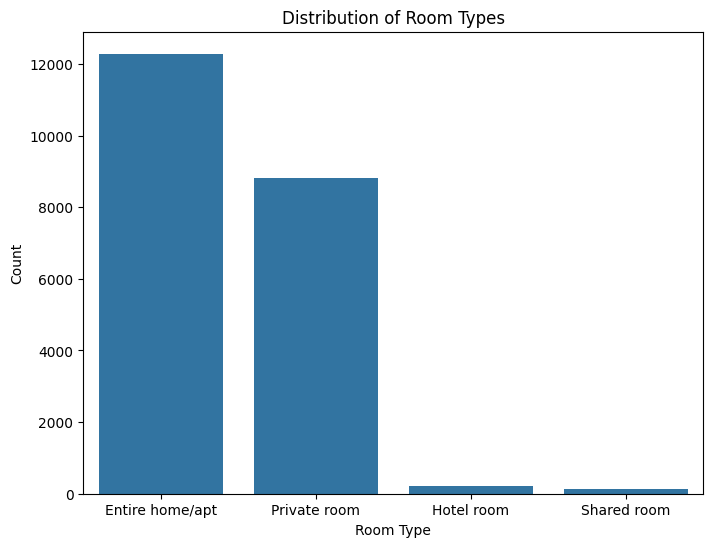

In [19]:
room_type_counts=df['room_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Distribution of Room Types')
plt.show()


values of  top 5 property_type(total 61 property_type)

In [21]:
df.property_type.value_counts()[:5]

property_type
Entire rental unit             9363
Private room in rental unit    4935
Private room in home           1878
Entire home                    1005
Room in hotel                   679
Name: count, dtype: int64

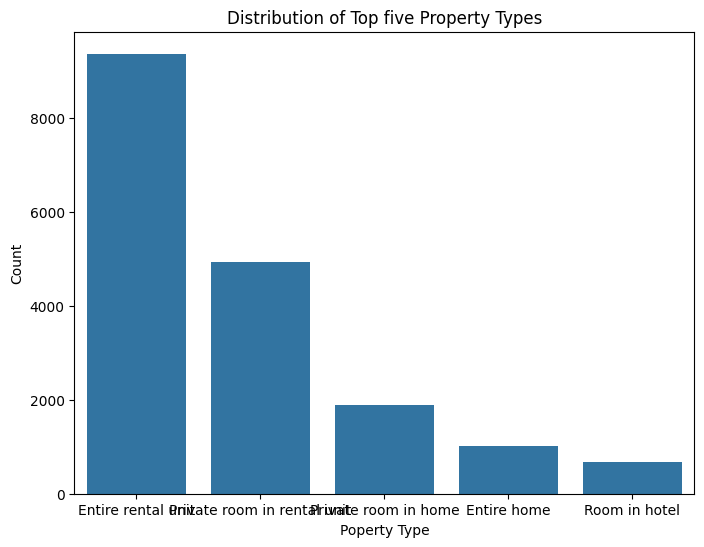

In [22]:
property_type_counts=df['property_type'].value_counts()[:5]
plt.figure(figsize=(8, 6))
sns.barplot(x=property_type_counts.index, y=property_type_counts.values)
plt.xlabel('Poperty Type')
plt.ylabel('Count')
plt.title('Distribution of Top five Property Types')
plt.show()

More than 75% of the listings are from Manhattan and Brooklyn. 
Majority of the listings are Entire home and Private room.

In [24]:
#average price of the stay in each neighbourhood group
grouped = df.groupby('neighbourhood_group_cleansed')['price'].mean().reset_index()

# Rename the column
grouped.rename(columns={'price': 'average_price'}, inplace=True)

# Sort by average price in descending order
grouped.sort_values(by='average_price', ascending=False, inplace=True)

# Print the result
print(grouped)


  neighbourhood_group_cleansed  average_price
2                    Manhattan     926.076077
1                     Brooklyn     237.436852
3                       Queens     136.636499
0                        Bronx     126.100331
4                Staten Island     124.877358


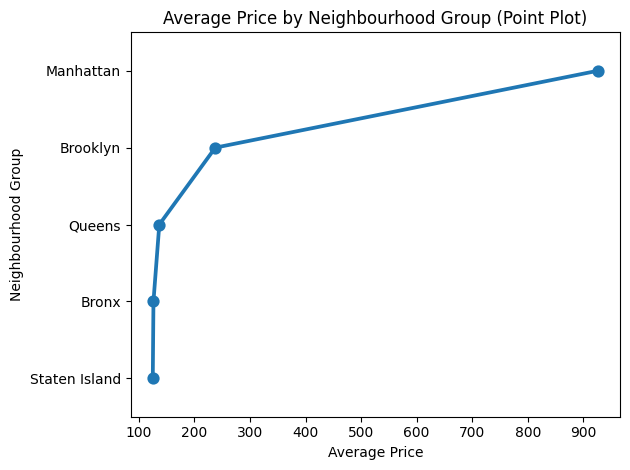

In [25]:

# Create the point plot
sns.pointplot(
    data=grouped,
    x='average_price',
    y='neighbourhood_group_cleansed',
      )

# Add labels and title
plt.xlabel("Average Price")
plt.ylabel("Neighbourhood Group")
plt.title("Average Price by Neighbourhood Group (Point Plot)")
plt.tight_layout()
plt.show()

In [26]:
# Filter prices under 500
filtered_df = df[df['price'] < 500]

# Group and compute mean
grouped = filtered_df.groupby('neighbourhood_group_cleansed')['price'].mean().reset_index()

# Rename column
grouped.rename(columns={'price': 'average_price'}, inplace=True)

# Sort by average price descending
grouped.sort_values(by='average_price', ascending=False, inplace=True)

# Print result
print(grouped)



  neighbourhood_group_cleansed  average_price
2                    Manhattan     215.368087
1                     Brooklyn     149.233357
3                       Queens     126.508157
4                Staten Island     110.621795
0                        Bronx     109.062361


C:\Users\sheri\AppData\Local\Temp\ipykernel_26488\1236345589.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cbnb = sns.violinplot(


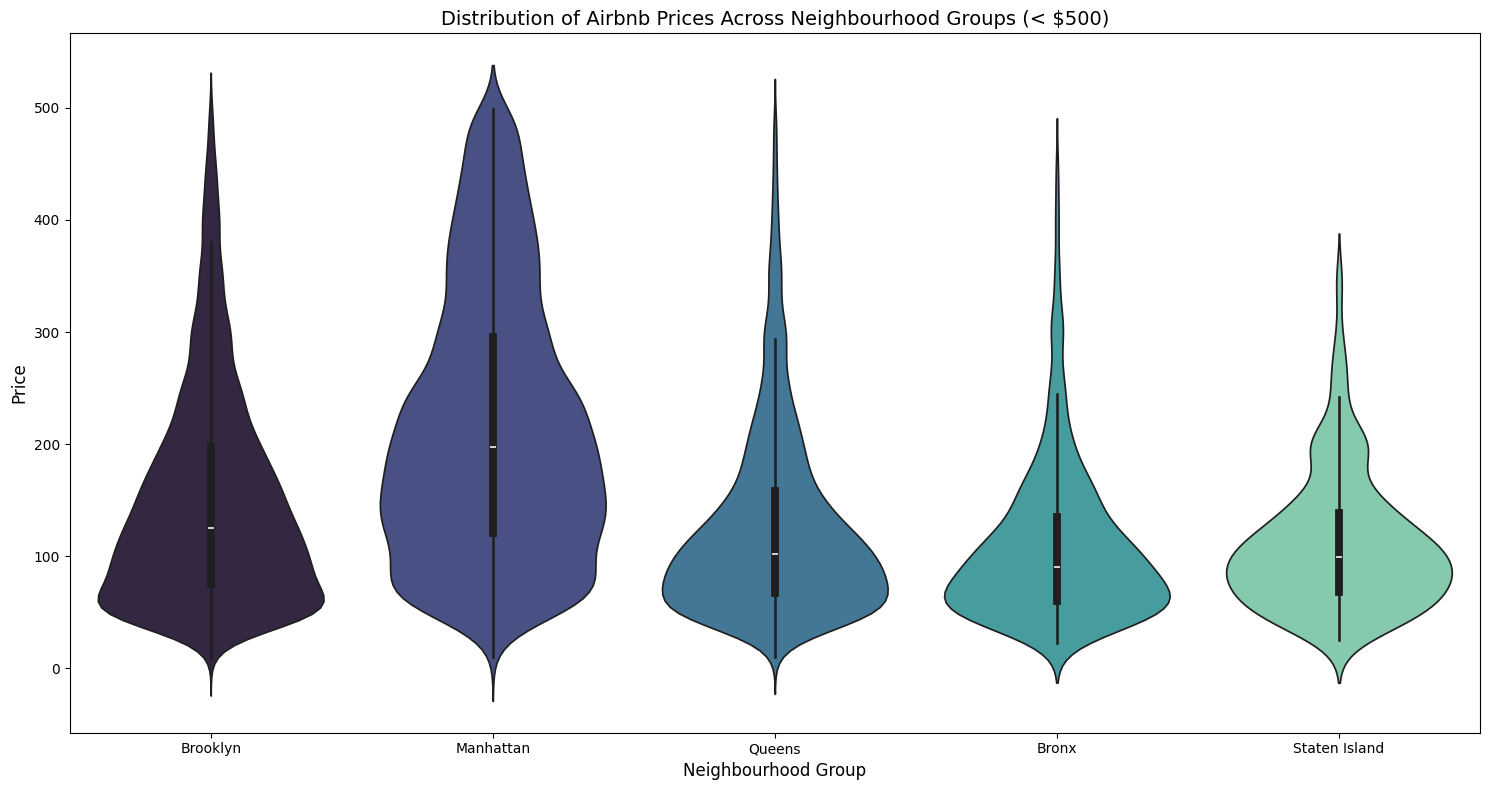

In [27]:


# Filter: Only listings with price less than 500
cheap_bnb = df[df.price < 500]

# Set the figure size
plt.figure(figsize=(15, 8))

# Create the violin plot
cbnb = sns.violinplot(
    data=cheap_bnb,
    x='neighbourhood_group_cleansed',
    y='price',
    palette='mako'
)

cbnb.set_title('Distribution of Airbnb Prices Across Neighbourhood Groups (< $500)', fontsize=14)
cbnb.set_xlabel('Neighbourhood Group', fontsize=12)
cbnb.set_ylabel('Price', fontsize=12)

#cbnb.set_xticklabels(cbnb.get_xticklabels(), rotation=45)


plt.tight_layout()
plt.show()


The average price of a listing in Newyork city varies across different neighbourhood groups. Manhattan has the highest average price and Staten Island has the lowest.
Considering cheapest listings for example price less than 500 Manhattan has a wide variety of expensive listings followed by Brooklyn. Queens,Bronx and Staten Isla
nd has more listings in the range 50$-150$.This indicate that rental price increases from outer boroughs towards center.
Being the Centre of the city and commercially important Manhattan could be a great option for investment rentals.

C:\Users\sheri\AppData\Local\Temp\ipykernel_26488\1895772209.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  avail = sns.boxplot(


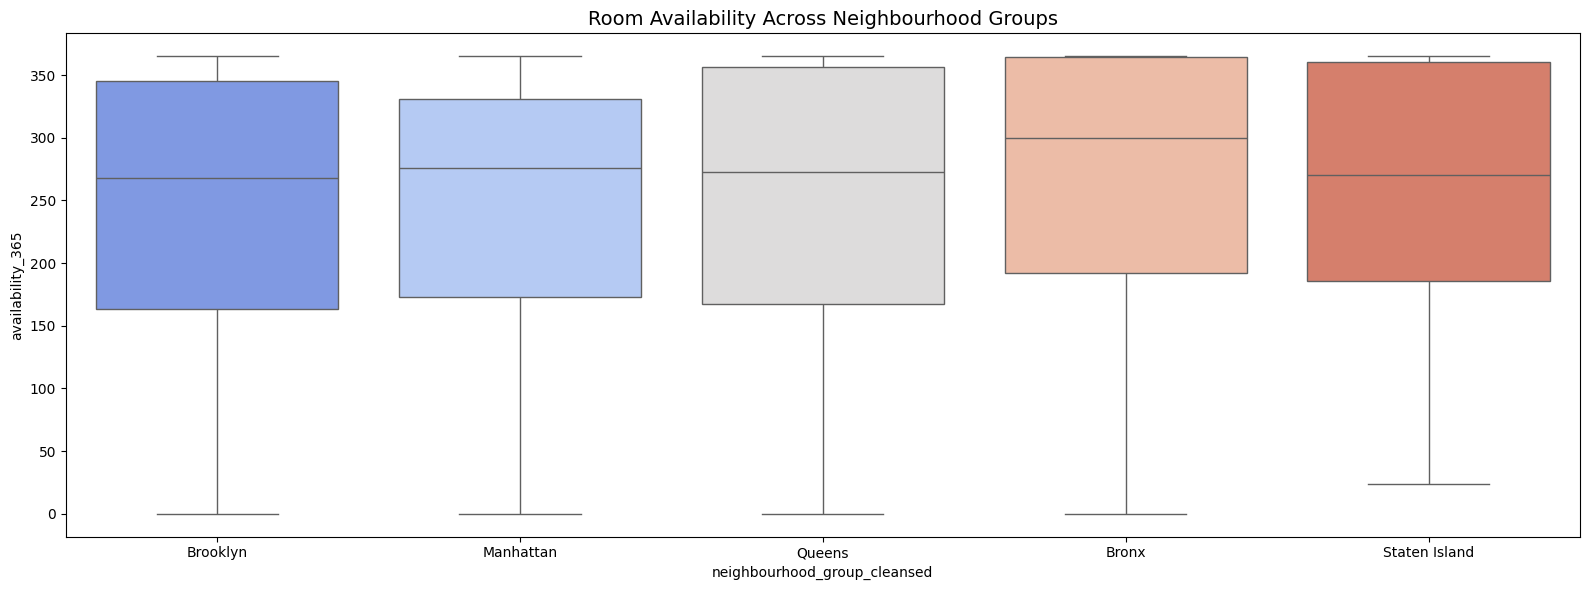

In [29]:
#plot listing availability across the different neighbourhood groups using a boxplot

plt.figure(figsize=(16, 6))
avail = sns.boxplot(
    data=df,
    x='neighbourhood_group_cleansed',
    y='availability_365',
    palette='coolwarm'
)
plt.title("Room Availability Across Neighbourhood Groups", fontsize=14)

plt.tight_layout()
plt.show()

Bronx has the highest median availability, suggesting many full-year hosts followed by Queens.
Manhattan has slilightly lower median, still high, likely due to part-time rentals
Staten Island has wider spread and high top whisker which is mixed usage patterns
Brooklyn is similar to Manhattan — balanced range of part-time and full-time listings

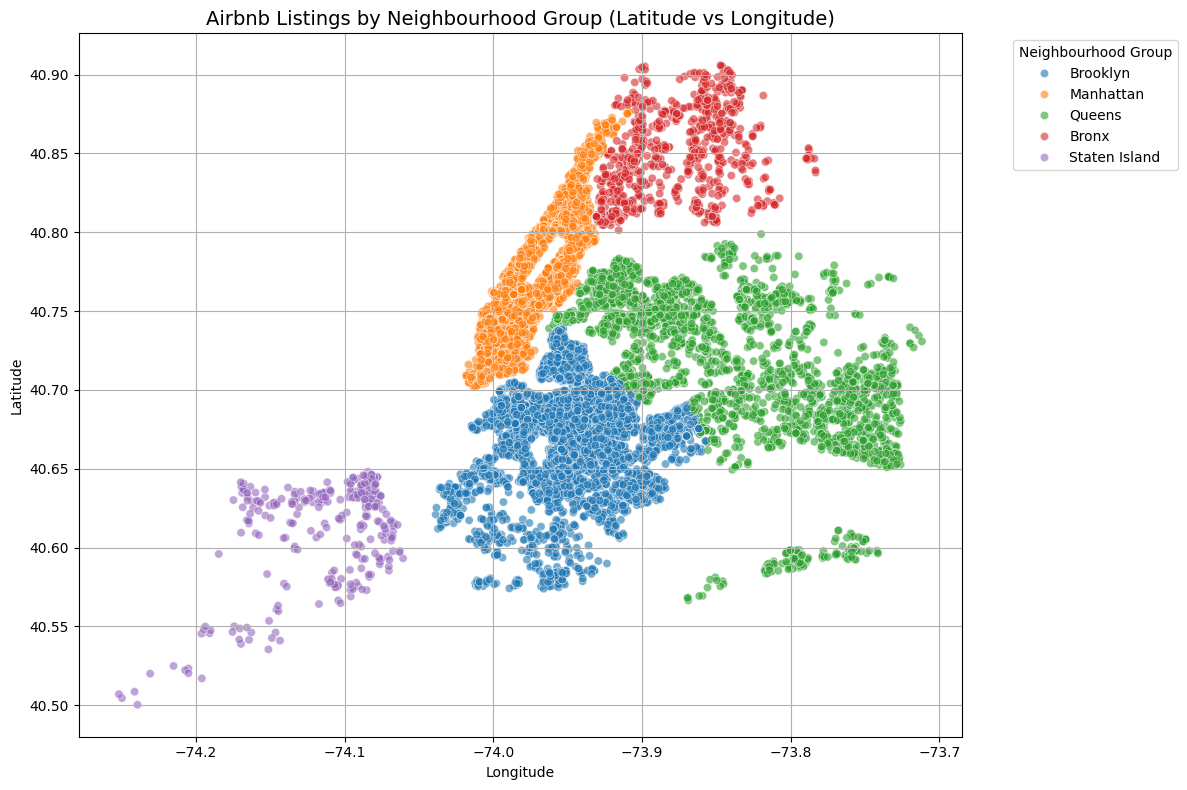

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='neighbourhood_group_cleansed',
    palette='tab10',
    alpha=0.6
)

plt.title('Airbnb Listings by Neighbourhood Group (Latitude vs Longitude)', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

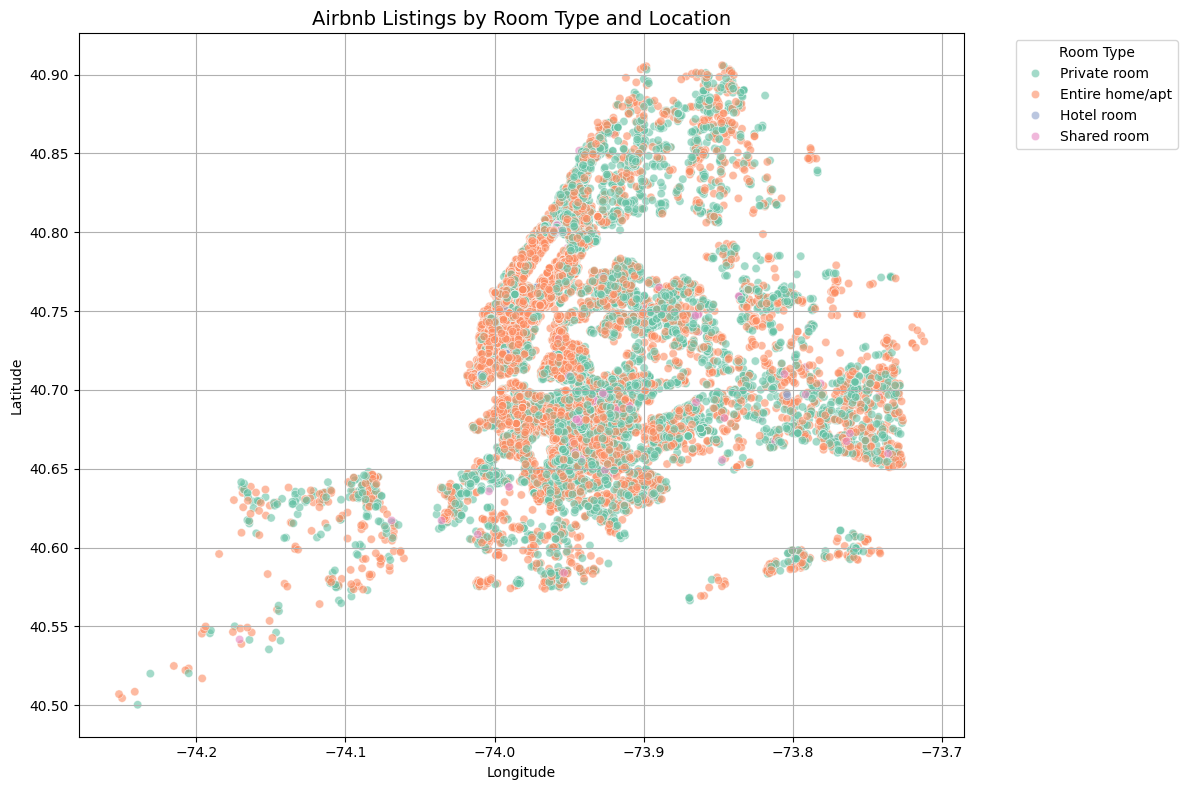

In [32]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='room_type',         
    palette='Set2',
    alpha=0.6
)

plt.title('Airbnb Listings by Room Type and Location', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

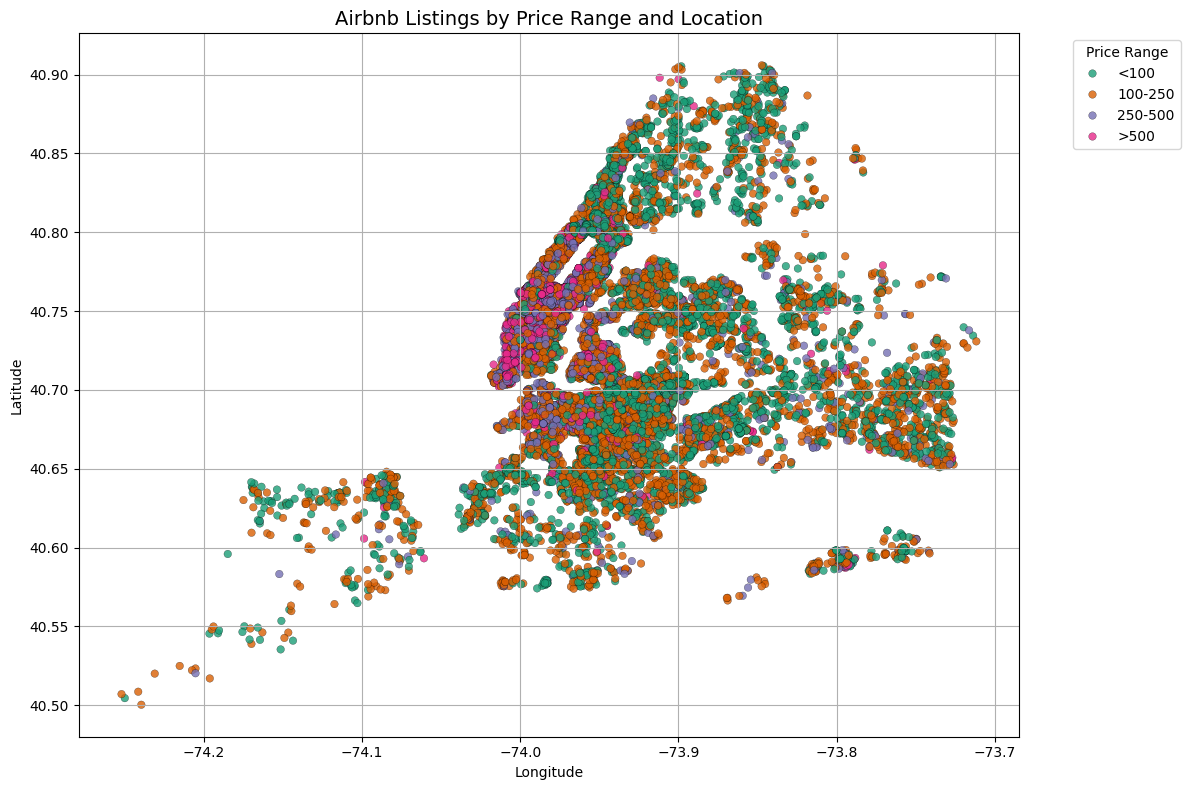

In [33]:
bins = [0, 100, 250, 500, df['price'].max()]
labels = ['<100', '100-250', '250-500', '>500']
df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='price_bin',
    palette='Dark2',       
    alpha=0.8,             
    s=30,                  
    edgecolor='black',     
    linewidth=0.2
)

plt.title('Airbnb Listings by Price Range and Location', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
df.drop(['price_bin'],axis=1,inplace=True)

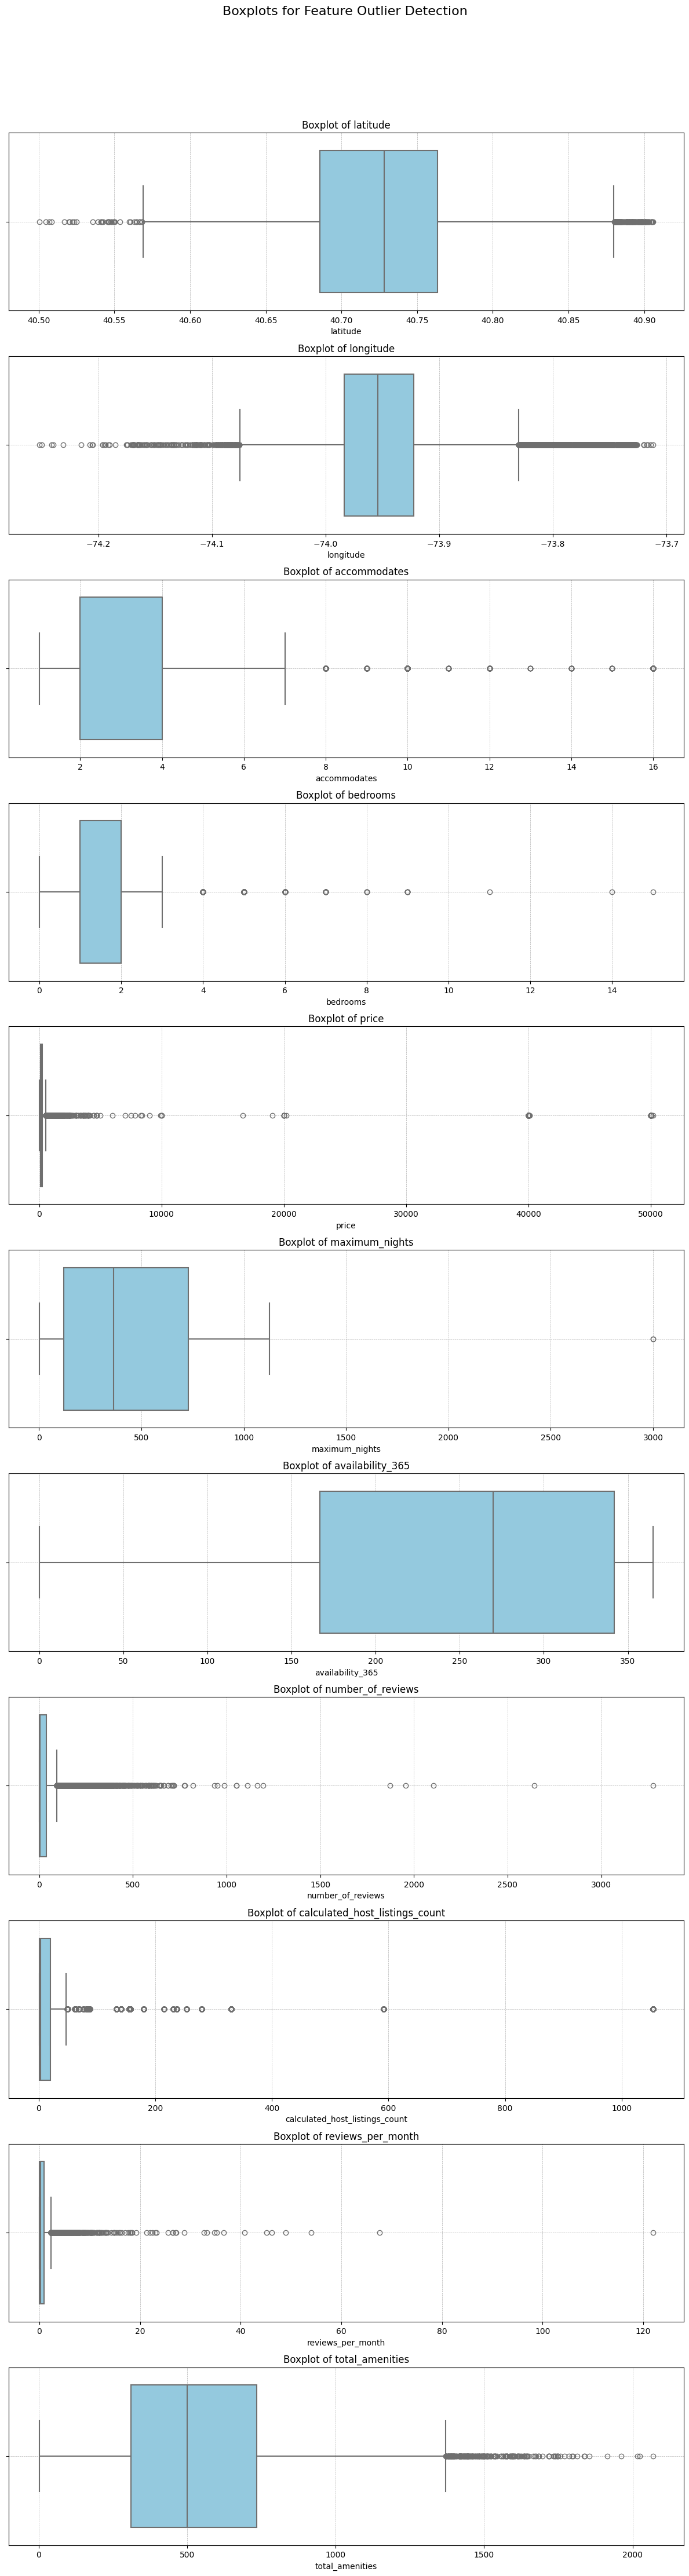

In [34]:

# Exclude name,id and categorical columns to detect outliers
features = df.columns.drop(['name','host_id','host_is_superhost','neighbourhood_cleansed','neighbourhood_group_cleansed','property_type','room_type'])

# Set up the figure
plt.figure(figsize=(12, len(features) * 4))  # Adjust height based on number of features

# Loop through features to plot one boxplot per row
for i, col in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df[col], color='skyblue', linewidth=1.5)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle("Boxplots for Feature Outlier Detection", fontsize=16, y=1.01)
plt.tight_layout()
plt.subplots_adjust(top=0.96)  # Add spacing for suptitle
plt.show()

In [35]:
df.shape

(21459, 18)

In [36]:
features = df.select_dtypes(include='number')
# Dictionary to store outlier indices per feature
outliers_dict = {}

# Loop through each feature and identify outliers using IQR
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers_dict[col] = outliers
    print(f"{col}: {len(outliers)} outliers")


# Combine all outlier indices from all features
all_outliers = set()
for idx_list in outliers_dict.values():
    all_outliers.update(idx_list)

#Drop outlier rows from the DataFrame
#df_cleaned = df.drop(index=all_outliers).reset_index(drop=True)

#print(f"\nOriginal shape: {df.shape}")
#print(f"New shape after outlier removal: {df_cleaned.shape}")

host_id: 0 outliers
latitude: 190 outliers
longitude: 1612 outliers
accommodates: 827 outliers
bedrooms: 855 outliers
price: 1529 outliers
maximum_nights: 2 outliers
availability_365: 0 outliers
number_of_reviews: 2448 outliers
calculated_host_listings_count: 4029 outliers
reviews_per_month: 2256 outliers
total_amenities: 208 outliers


In [37]:
features = df.select_dtypes(include='number')  # Only numeric columns
skew_values = features.skew().sort_values(ascending=False)
print(skew_values)

reviews_per_month                 19.849236
price                             11.899123
number_of_reviews                  9.653172
calculated_host_listings_count     3.432011
accommodates                       2.536081
bedrooms                           2.061235
longitude                          1.031267
maximum_nights                     0.805464
total_amenities                    0.651620
host_id                            0.622153
latitude                           0.081281
availability_365                  -0.630367
dtype: float64


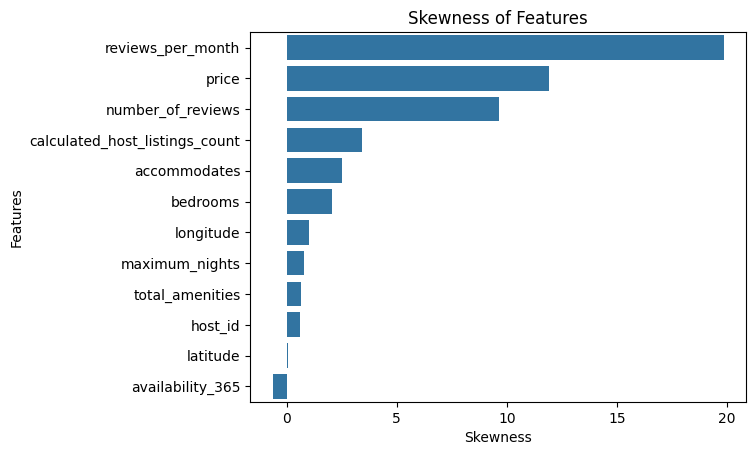

In [38]:
sns.barplot(x=skew_values.values, y=skew_values.index)
plt.title("Skewness of Features")
plt.xlabel("Skewness")
plt.ylabel("Features")
plt.show()

Transforming 6 highly skewed columns (skew > 2):
✔ Transforming 'reviews_per_month' (original skew: 19.85)
✔ Transforming 'price' (original skew: 11.90)
✔ Transforming 'number_of_reviews' (original skew: 9.65)
✔ Transforming 'calculated_host_listings_count' (original skew: 3.43)
✔ Transforming 'accommodates' (original skew: 2.54)
✔ Transforming 'bedrooms' (original skew: 2.06)


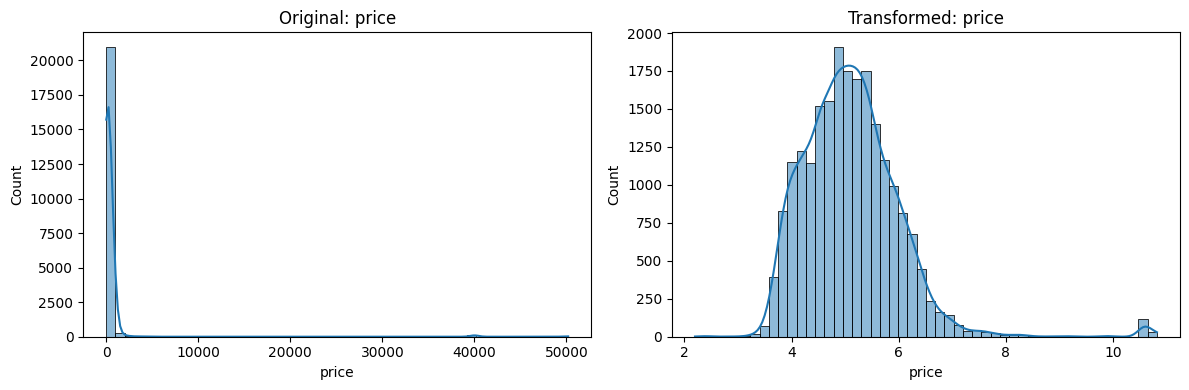

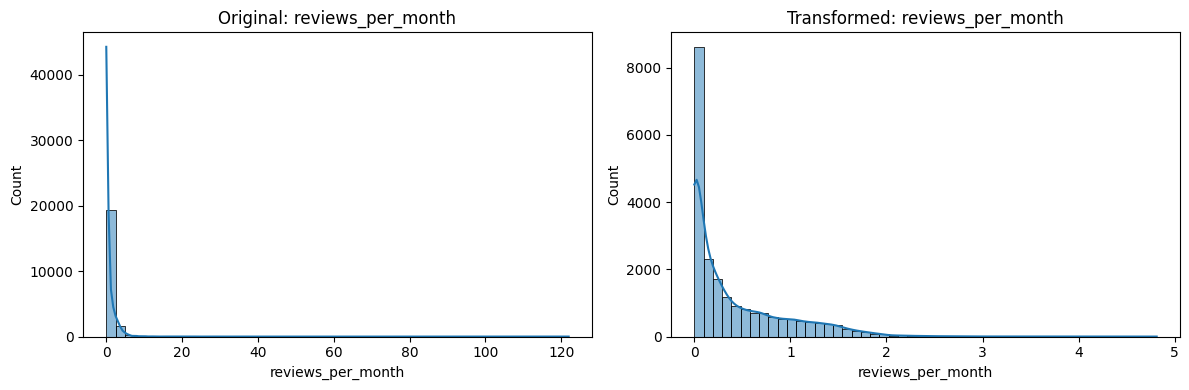

In [39]:
def transform_skewed_features(df, skew_threshold=2):
    df_transformed = df.copy()
    
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include='number')
    
    # Calculate skewness
    skewness = numeric_cols.skew().sort_values(ascending=False)
    
    # Identify highly skewed columns
    skewed_cols = skewness[skewness > skew_threshold].index.tolist()

    print(f"Transforming {len(skewed_cols)} highly skewed columns (skew > {skew_threshold}):")
    for col in skewed_cols:
        if (df_transformed[col] < 0).any():
            print(f"⚠️ Skipped '{col}' (contains negative values)")
            continue
        print(f"✔ Transforming '{col}' (original skew: {skewness[col]:.2f})")
        df_transformed[col] = np.log1p(df_transformed[col])
    
    return df_transformed
df_cleaned = transform_skewed_features(df)

def plot_before_after(df, df_cleaned, columns):
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Original
        sns.histplot(df[col], bins=50, kde=True, ax=axes[0])
        axes[0].set_title(f'Original: {col}')
        
        # Transformed
        if col in df_cleaned.columns:
            sns.histplot(df_cleaned[col], bins=50, kde=True, ax=axes[1])
            axes[1].set_title(f'Transformed: {col}')
        else:
            axes[1].set_title(f'Transformed: {col} (not found)')
        
        plt.tight_layout()
        plt.show()


plot_before_after(df, df_cleaned, ['price', 'reviews_per_month'])

# Boxplot of price

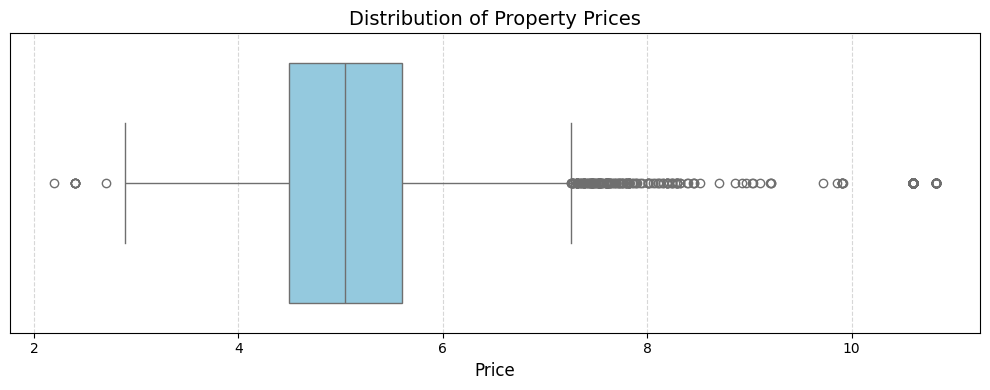

In [41]:
plt.figure(figsize=(10, 4)) 

sns.boxplot(x=df_cleaned['price'], color='skyblue')

plt.title('Distribution of Property Prices', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.yticks([]) 
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [42]:
df_cleaned.shape

(21459, 18)

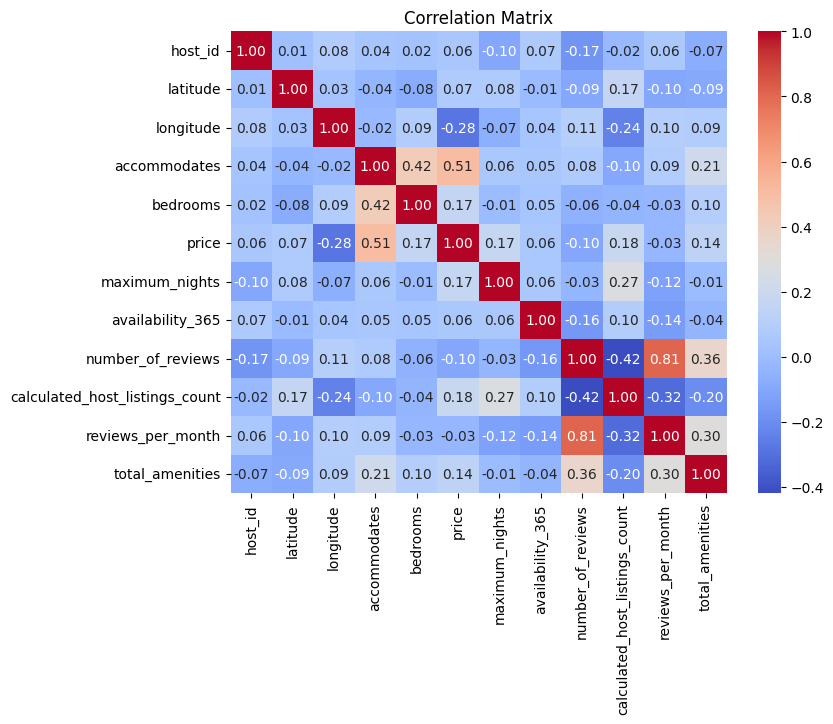

In [43]:
# Compute correlation matrix
corr_matrix = df_cleaned.corr(numeric_only=True)


# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [44]:
df_cleaned.to_csv('../data/clean/airbnbnyc_skewless.csv', index=False)